In [1]:
!nvidia-smi

Tue Aug  6 23:04:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 545.29.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090 Ti     Off | 00000000:01:00.0  On |                  Off |
|  0%   48C    P8              30W / 480W |    453MiB / 24564MiB |     39%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import tensorflow as tf

2024-08-06 23:04:48.758228: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 23:04:48.785154: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
tf.config.list_physical_devices()

2024-08-06 23:04:50.989701: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 23:04:50.993721: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 23:04:50.993814: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Librerias

SE INSTALARAN LIBRERIAS PARA TRABAJAR MAS ADELANTE.

In [ ]:
#pip install numpy pandas matplotlib Augmentor seaborn opencv-python scikit-learn

In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Rescaling,  GlobalMaxPooling2D,  GlobalAveragePooling2D, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers,models
from tensorflow.keras.regularizers import l1, l2
from keras.layers import BatchNormalization
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os.path

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-07-26 19:06:07.025156: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 19:06:07.051509: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


IMPLEMENTACION DE AUMENTACION DE LOS DATOS.

Visualizamos una grafica que contiene el nombre de la etiqueta y la cantidad de imagenes asociadas a ella

{'Sana': 1500, 'RedRot': 1500, 'Roya': 1500, 'Amarillo': 1500, 'Mosaico': 1500}


/tmp/ipykernel_1348834/2643906322.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Categoria', y='Cantidad' , palette='viridis')


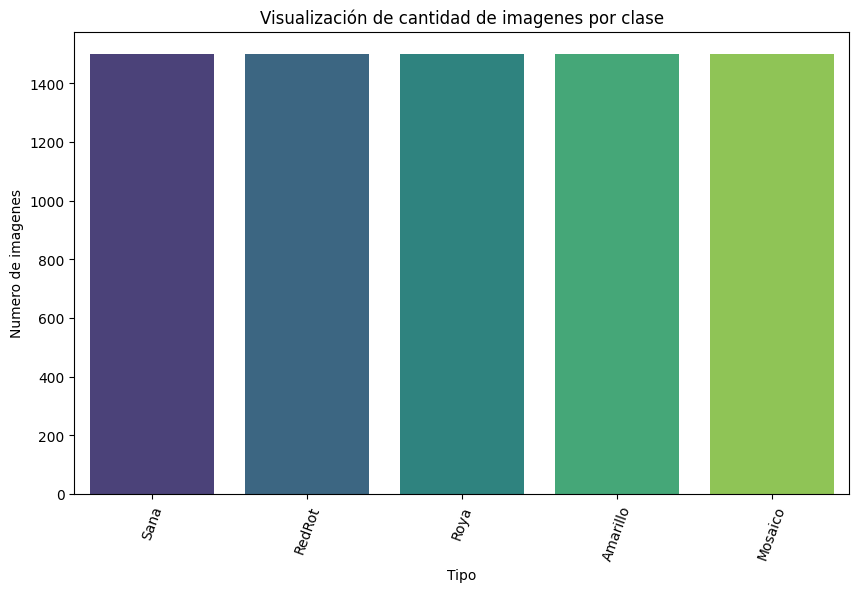

In [2]:
def secciones(folder_path):
    carpetas_con_conteo = {}

    for root, dirs, archivo in os.walk(folder_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            file_count = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
            carpetas_con_conteo[dir_name] = file_count
    
    return carpetas_con_conteo


def plot_image_classes(df, category):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Categoria', y='Cantidad' , palette='viridis')
    plt.title(f'{category}')
    plt.xlabel('Tipo')
    plt.ylabel('Numero de imagenes')
    plt.xticks(rotation=70)
    plt.show()


train_dir = '/home/Enfermedad/'
carpetas_con_conteo = secciones(train_dir)
print(carpetas_con_conteo)

df = pd.DataFrame(list(carpetas_con_conteo.items()), columns=['Categoria', 'Cantidad'])

plot_image_classes(df, 'Visualización de cantidad de imagenes por clase')

Creamos una instancia donde se guardaran automaticamente las fotografias modificadas

In [14]:
import Augmentor
p = Augmentor.Pipeline("/home/Enfermedad/Sana/")

Initialised with 1500 image(s) found.
Output directory set to /home/Enfermedad/Sana/output.

Modificaciones que se le aplicaran a las imagenes con su respectiva probabilidad de ocurrir

In [15]:
p.rotate(probability=0.6, max_left_rotation=20, max_right_rotation=20)
p.zoom(probability=0.5, min_factor=1.2, max_factor=1.6)
p.skew(probability=0.5)
p.resize(probability=1.0, width=493, height=493)
p.sample(548)

Processing <PIL.Image.Image image mode=RGB size=493x493 at 0x7EFC9E2F1A90>: 100%|██████████| 548/548 [00:00<00:00, 577.24 Samples/s]


Sacar los datos de la carpeta output y colocarla en la carpeta raiz

In [16]:
!mv /home/Enfermedad/Sana/output/*.jpg /home/Enfermedad/Sana/
!mv /home/Enfermedad/Sana/output/*.jpeg /home/Enfermedad/Sana/
!mv /home/Enfermedad/Sana/output/*.png /home/Enfermedad/Sana/


mv: cannot stat '/home/Enfermedad/Sana/output/*.png': No such file or directory


Obtención de los datos

Se obtiene todas las direcciones de las imagenes con su etiqueta correspondiente.

In [3]:
def convert_path_to_df(dataset):
    image_dir = Path(dataset)

    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.JPEG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df('/home/Enfermedad/')
print(image_df)

                                               Filepath    Label
0     /home/Enfermedad/Sana/Sana_original_image218.j...     Sana
1                    /home/Enfermedad/Sana/image136.jpg     Sana
2     /home/Enfermedad/Sana/Sana_original_image380.j...     Sana
3     /home/Enfermedad/Sana/Sana_original_image252.j...     Sana
4                    /home/Enfermedad/Sana/image196.jpg     Sana
...                                                 ...      ...
7495  /home/Enfermedad/Mosaico/Mosaico_original_mosa...  Mosaico
7496  /home/Enfermedad/Mosaico/Mosaico_original_mosa...  Mosaico
7497  /home/Enfermedad/Mosaico/Mosaico_original_mosa...  Mosaico
7498  /home/Enfermedad/Mosaico/Mosaico_original_mosa...  Mosaico
7499  /home/Enfermedad/Mosaico/Mosaico_original_mosa...  Mosaico

[7500 rows x 2 columns]


Se crean dos objetos en los cuales se dividen los datos de entrenamiento y test, con una proporcion de 80% a 20% respectivamente

In [4]:
xtrain, xtest, ytrain, ytest  = train_test_split(image_df['Filepath'], image_df['Label'], test_size=0.2, shuffle=True, stratify=image_df['Label'])
#print(train_df)


In [5]:
train_df = pd.concat([xtrain, ytrain], axis=1)
test_df = pd.concat([xtest, ytest], axis=1)


In [7]:
train_df

,Filepath,Label
3501,/home/Enfermedad/RedRot/RedRot_original_redrot...,RedRot
2665,/home/Enfermedad/RedRot/redrot (191).jpeg,RedRot
276,/home/Enfermedad/Sana/Sana_original_image186.j...,Sana
6903,/home/Enfermedad/Mosaico/Mosaico_original_mosa...,Mosaico
3089,/home/Enfermedad/RedRot/redrot (427).jpeg,RedRot
...,...,...
2417,/home/Enfermedad/Sana/Sana_original_Sana_origi...,Sana
1050,/home/Enfermedad/Amarillo/Yellow Leaf1187.jpg,Amarillo
714,/home/Enfermedad/RedRot/70.jpg,RedRot
3401,/home/Enfermedad/RedRot/RedRot_original_redrot...,RedRot


Se crea un metodo donde seleccionamos el input, dependiendo del modelo el input es diferente

In [8]:
def input_correspondiente(input):
    train_generator = ImageDataGenerator(
        preprocessing_function=input
    )
    val_generator = ImageDataGenerator(
        preprocessing_function=input
    )
    return train_generator, val_generator
def input_test(input):
    test_generator = ImageDataGenerator(
        preprocessing_function=input
    )
    return test_generator

In [9]:
input = tf.keras.applications.efficientnet_v2.preprocess_input
train_generator, val_generator = input_correspondiente(input)
test_generator = input_test(input)

Con el input listo se crean los objetos que contendran las imagenes de entrenamiento y validacion, por defecto la class_mode es 'categorical' para usar la funcion de perdida 'categorical_crossentropy'

In [10]:
def obtener_datos_entrenamiento(entranamiento, validacion):
    
    train_images = train_generator.flow_from_dataframe(
        dataframe=entranamiento,
        x_col='Filepath',
        y_col='Label',
        target_size=(493, 493),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=None,
        subset='training'
    )

    val_images = val_generator.flow_from_dataframe(
        dataframe=validacion,
        x_col='Filepath',
        y_col='Label',
        target_size=(493, 493),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=None,
        subset='training'
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(493, 493),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=None,
        subset='training'
    )
    return train_images, val_images, test_images

# Metodos para probar los modelos

In [13]:
def EfficientNetV2_B0(numero_clases, tamano):
  modelo = models.Sequential()
  modelo_efficient = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=tamano,
    pooling='max',
  )
  modelo.add(modelo_efficient)
  modelo.add(Dense(860,activation='relu'))
  modelo.add(Dense(numero_clases, activation='softmax'))
  modelo.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return modelo

In [11]:
def DenseNet121(numero_clases, entrada):
  modelo = models.Sequential()
  modelo_densenet121 = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=entrada,
    pooling='max'
  )
  modelo.add(modelo_densenet121)
  modelo.add(Dense(680, kernel_regularizer=l2(0.01) ,activation='relu'))
  modelo.add(Dropout(0.4))
  modelo.add(Dense(units=numero_clases, activation='softmax'))
  modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return modelo

In [59]:
def MobileNetV2(numero_clases, entrada):
  modelo_mobilenetv2 = tf.keras.applications.MobileNetV2(
    input_shape=entrada,
    alpha=1.0,
    include_top=False,
    weights='imagenet',
    pooling='max'
  )
  inputs = modelo_mobilenetv2.input
  x = Rescaling(scale=1./127.5, offset=-1)(inputs)
  x = Dense(858, activation='relu')(modelo_mobilenetv2.output)
  x = Dropout(0.4)(x)
  x = Dense(430, activation='relu')(modelo_mobilenetv2.output)
  x = Dropout(0.4)(x)
  outputs = Dense(numero_clases, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=outputs)
  model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
  )
  return model

In [22]:
def NASNetMobile(numero_clases, tamano):
  modelo_nasnetmobile = tf.keras.applications.NASNetMobile(
    input_shape=tamano,
    include_top=False,
    weights='imagenet',
    pooling='max',
  )
  modelo = models.Sequential()
  modelo.add(modelo_nasnetmobile)
  modelo.add(Dense(800, kernel_regularizer=l2(0.01), activation='relu'))
  modelo.add(Dense(numero_clases, activation='softmax'))
  modelo.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
  )
  return modelo

In [9]:
def ResNet101V2(numero_clases, tamano):
    modelo_resnet101v2 = tf.keras.applications.ResNet101V2(
        include_top=False,
        weights='imagenet',
        input_shape=tamano,
        pooling='max'
    )
    modelo = models.Sequential()
    modelo.add(modelo_resnet101v2)
    modelo.add(Dense(900, kernel_regularizer= l1(0.01) ,activation='relu'))
    modelo.add(Dropout(0.4))
    modelo.add(Dense(numero_clases, activation='softmax'))
    modelo.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
    )
    return modelo

In [9]:
def VGG16(numero_clases, tamano):
    modelo_vgg16 = tf.keras.applications.VGG16(
        include_top=False,
        weights=None,
        input_shape=tamano,
        pooling='max'
    )
    modelo = models.Sequential()
    modelo.add(modelo_vgg16)
    modelo.add(Dense(800, activation='relu'))
    modelo.add(Dense(numero_clases, activation='softmax'))
    modelo.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
    )
    return modelo

In [ ]:
Epocas = 25
modelo = ResNet101V2(5, (493, 493, 3))
registro_general = modelo.fit(train_images, epochs=Epocas, validation_data= val_images )

IMPLEMENTACION DE PRUEBAS EXHAUSTIVAS

In [15]:
class2id = dict()
for idx, clase in enumerate(pd.DataFrame(image_df['Label'].unique(), columns=['Label'])['Label']):
    class2id[clase] = idx
labels_array = np.array(list(class2id.values()))
labels_array

array([0, 1, 2, 3, 4])

In [16]:
def sacar_imagenes_generales (imagenes_generales, modelo):
    
    predictions = []
    etiquetas = []
    
    for i in range(len(imagenes_generales)):
            
        images, labels = next(imagenes_generales)

        batch_predictions = np.argmax(modelo.predict(images), axis=1)
        batch_labels =  np.argmax(labels, axis=1)
            
        predictions.extend(batch_predictions)
        etiquetas.extend(batch_labels)
        
    predictions = np.array(predictions)
    etiquetas = np.array(etiquetas)
    
    return etiquetas, predictions

def obtener_metricas_micro (etiquetas, predictions, tipo):
    avg_precision = precision_score(etiquetas, predictions, labels=labels_array,average=tipo)
    avg_recall = recall_score(etiquetas, predictions, labels=labels_array,average=tipo)
    avg_f1 = f1_score(etiquetas, predictions, labels=labels_array,average=tipo)
    return avg_precision, avg_recall, avg_f1

results_df = pd.DataFrame({})
classification_metrics = pd.DataFrame(columns=['accuracy', 
                                                'micro_avg_precision',          
                                                'micro_avg_recall',
                                                'micro_avg_f1',
                                                'macro_avg_precision',
                                                'macro_avg_recall',
                                                'macro_avg_f1',
                                                'iteration',
                                                'fold',
                                                'data_type'])

K = 5
kf = StratifiedKFold(n_splits=K, shuffle=True)

for iteration in np.arange(31) + 1:
    fold = 1
    
    for train_indices, test_indices in kf.split(train_df, train_df['Label']):
        
        print(f'Iteracion {iteration} Fold {fold} ')
        
        datos_entranamiento = train_df.iloc[train_indices]
        datos_validacion = train_df.iloc[test_indices]
        
        imagenes_entramiento, imagenes_validacion, imagenes_test = obtener_datos_entrenamiento(datos_entranamiento, datos_validacion)
    
        """
        for i in range (2):
            imagenes, labels = next(imagenes_validacion)
            batch_labels =  np.argmax(labels, axis=1)
            imagenes = np.array(batch_labels)
            print(imagenes)
        
        """
        
        Epocas = 20
        modelo = EfficientNetV2_B0(5, (493, 493, 3))
        registro_general = modelo.fit(imagenes_entramiento, epochs=Epocas, validation_data=imagenes_validacion, verbose=0)
        
        iteration_history = pd.DataFrame(registro_general.history)
        iteration_history['epoch'] = np.arange(Epocas) + 1
        iteration_history['iteration'] = iteration
        iteration_history['fold'] = fold 
        
        entrenamiento_predictions = []
        entrenamiento_etiquetas = []
        
        validacion_predictions = []
        validacion_etiquetas = []
        
        test_predictions = []
        test_etiquetas = []
        
        entrenamiento_etiquetas, entrenamiento_predictions = sacar_imagenes_generales (imagenes_entramiento, modelo)
        validacion_etiquetas, validacion_predictions = sacar_imagenes_generales(imagenes_validacion, modelo)
        test_etiquetas, test_predictions = sacar_imagenes_generales(imagenes_test, modelo)
        
        train_accuracy = accuracy_score(entrenamiento_etiquetas, entrenamiento_predictions)
        val_accuracy = accuracy_score(validacion_etiquetas, validacion_predictions)
        test_accuracy = accuracy_score(test_etiquetas, test_predictions)
        
        
        train_micro_avg_precision, train_micro_avg_recall, train_micro_avg_f1 = obtener_metricas_micro(entrenamiento_etiquetas, entrenamiento_predictions, 'micro')
        
        val_micro_avg_precision, val_micro_avg_recall, val_micro_avg_f1 = obtener_metricas_micro(validacion_etiquetas, validacion_predictions, 'micro')
        
        test_micro_avg_precision, test_micro_avg_recall, test_micro_avg_f1 = obtener_metricas_micro(test_etiquetas, test_predictions, 'micro')
        
        train_macro_avg_precision, train_macro_avg_recall, train_macro_avg_f1 = obtener_metricas_micro(entrenamiento_etiquetas, entrenamiento_predictions, 'macro')
        
        val_macro_avg_precision, val_macro_avg_recall, val_macro_avg_f1 = obtener_metricas_micro(validacion_etiquetas, validacion_predictions, 'macro')
        
        test_macro_avg_precision, test_macro_avg_recall, test_macro_avg_f1 = obtener_metricas_micro(test_etiquetas, test_predictions, 'macro')
        
        print(train_accuracy)
        #print(train_micro_avg_precision)
        #print(train_micro_avg_recall)
        #print(train_micro_avg_f1)
        #print(train_macro_avg_precision)
        #print(train_macro_avg_recall)
        #print(train_macro_avg_f1)
        
        print(val_accuracy)
        #print(val_micro_avg_precision)
        #print(val_micro_avg_recall)
        #print(val_micro_avg_f1)
        #print(val_macro_avg_precision)
        #print(val_macro_avg_recall)
        #print(val_macro_avg_f1)
        
        print(test_accuracy)
        #print(test_micro_avg_precision)
        #print(test_micro_avg_recall)
        #print(test_micro_avg_f1)
        #print(test_macro_avg_precision)
        #print(test_macro_avg_recall)
        #print(test_macro_avg_f1)
        iteration_metrics = pd.DataFrame({'accuracy' : [train_accuracy, val_accuracy, test_accuracy],
                                                  'micro_avg_precision' : [train_micro_avg_precision, val_micro_avg_precision, test_micro_avg_precision],
                                                  'micro_avg_recall' : [train_micro_avg_recall, val_micro_avg_recall, test_micro_avg_recall],
                                                  'micro_avg_f1' : [train_micro_avg_f1, val_micro_avg_f1, test_micro_avg_f1],
                                                  'macro_avg_precision' : [train_macro_avg_precision, val_macro_avg_precision, test_macro_avg_precision],
                                                  'macro_avg_recall' : [train_macro_avg_recall, val_macro_avg_recall, test_macro_avg_recall],
                                                  'macro_avg_f1' : [train_macro_avg_f1, val_macro_avg_f1, test_macro_avg_f1],
                                                  'iteration' : [iteration, iteration, iteration],
                                                  'fold' : [fold, fold, fold],
                                                  'data_type' : ['train', 'val', 'test']})
        
        
        results_df = pd.concat([results_df, iteration_history], ignore_index=True)
        classification_metrics = pd.concat([classification_metrics, iteration_metrics], ignore_index=True)
        fold += 1
    results_df.to_csv('/home/Pruebas_Exhaustivas/EfficientNetV2B0/cross_validation_history_' + 'EfficientNetV2_B0_A.csv', index=False)
    classification_metrics.to_csv('/home/Pruebas_Exhaustivas/EfficientNetV2B0/cross_validation_metrics_' + 'EfficientNetV2_B0_A.csv', index=False)

Found 3000 validated image filenames belonging to 5 classes.
Found 3000 validated image filenames belonging to 5 classes.
Found 1500 validated image filenames belonging to 5 classes.


2024-07-26 19:10:28.222142: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-26 19:10:28.225495: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-26 19:10:28.225579: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1722021044.914850 1351313 service.cc:145] XLA service 0x7fcf34004200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722021044.914882 1351313 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2024-07-26 19:10:45.467812: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-26 19:10:47.157751: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1722021055.

 1/94 ━━━━━━━━━━━━━━━━━━━━ 1:18:02 50s/step - accuracy: 0.2500 - loss: 3.1940

I0000 00:00:1722021079.492404 1351313 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1722021089.056360 1351905 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_23947', 236 bytes spill stores, 236 bytes spill loads

I0000 00:00:1722021089.081961 1351890 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_23947', 624 bytes spill stores, 624 bytes spill loads



 2/94 ━━━━━━━━━━━━━━━━━━━━ 53:31 35s/step - accuracy: 0.2232 - loss: 13.9612 

I0000 00:00:1722021114.340997 1351310 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_13', 16 bytes spill stores, 16 bytes spill loads



94/94 ━━━━━━━━━━━━━━━━━━━━ 104s 576ms/step - accuracy: 0.5079 - loss: 7.1877 - val_accuracy: 0.9060 - val_loss: 0.2731
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.9107 - loss: 0.2383 - val_accuracy: 0.9250 - val_loss: 0.1901
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/

I0000 00:00:1722021188.269444 1359654 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2282', 332 bytes spill stores, 332 bytes spill loads

I0000 00:00:1722021188.375094 1359650 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2282', 812 bytes spill stores, 812 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
0.9503333333333334
0.925
0.9273333333333333
Found 3000 validated image filenames belonging to 5 classes.
Found 3000 validated image filenames belonging to 5 classes.
Found 1500 validated image filenames belonging to 5 classes.


/tmp/ipykernel_1348834/2892594710.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  classification_metrics = pd.concat([classification_metrics, iteration_metrics], ignore_index=True)


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 79s 432ms/step - accuracy: 0.3859 - loss: 8.2378 - val_accuracy: 0.8297 - val_loss: 0.4256
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.8576 - loss: 0.3888 - val_accuracy: 0.9140 - val_loss: 0.2205
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 79s 437ms/step - accuracy: 0.3639 - loss: 9.2453 - val_accuracy: 0.6837 - val_loss: 0.8240
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.7383 - loss: 0.6877 - val_accuracy: 0.8317 - val_loss: 0.4425
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 80s 440ms/step - accuracy: 0.4401 - loss: 8.8410 - val_accuracy: 0.8187 - val_loss: 0.5154
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.8605 - loss: 0.3799 - val_accuracy: 0.9077 - val_loss: 0.2509
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/s

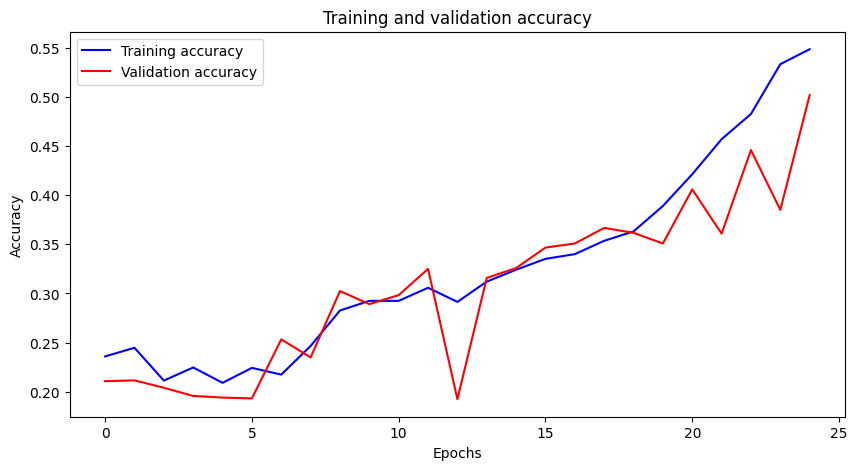

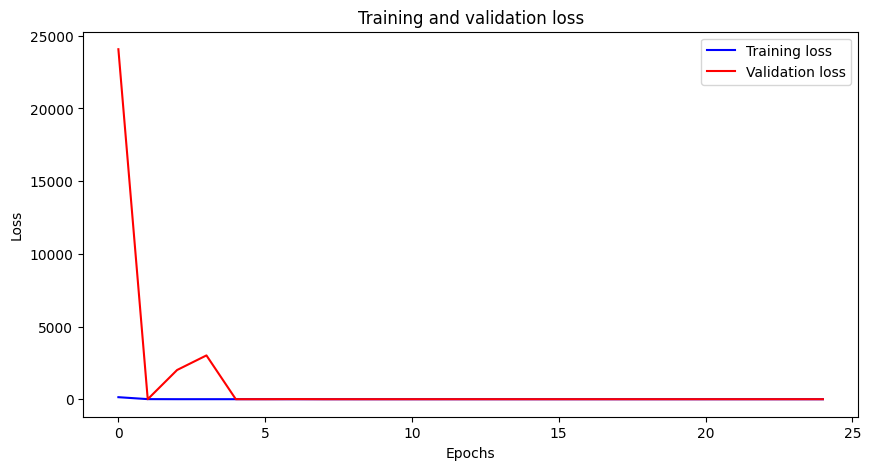

In [13]:
direccion_general = '/home/Registro_Datos/ResNet101v2/'
nombres_graficas = ['C_accuracy.png', 'C_loss.png']
nombre_datos = 'C.csv'
visualizar(registro_general, direccion_general, nombres_graficas)
guardar_datos(registro_general, direccion_general, nombre_datos)

In [10]:
def visualizar (registro, direccion_base, nombre):
    direccion_final_accuracy = direccion_base + nombre[0]
    direccion_final_loss = direccion_base + nombre[1]

    accuracy = registro.history['accuracy']
    val_accuracy = registro.history['val_accuracy']

    loss = registro.history['loss']
    val_loss = registro.history['val_loss']

    epochs = range(len(accuracy))

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(direccion_final_accuracy, bbox_inches='tight')

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(direccion_final_loss, bbox_inches='tight')

    plt.show()

In [11]:
def guardar_datos(registro, direccion_base, nombre):
    direccion_final = direccion_base + nombre

    iteration_history = pd.DataFrame(registro.history)
    iteration_history['epoch'] = registro.epoch
    
    iteration_history.to_csv(direccion_final, index=False)
    iteration_history.to_csv(direccion_final, index=False)

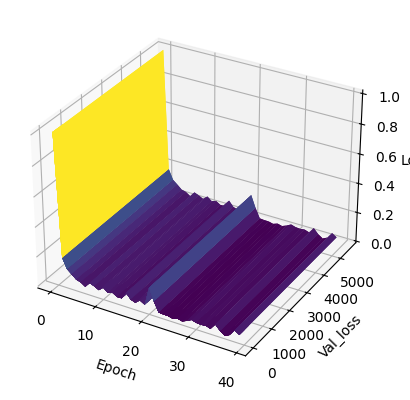

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('/home/Registro_Datos/NasNetMobile/A.csv')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = data['epoch']
Y = data['val_loss']
Z = data['loss']

X, Y = np.meshgrid(X, Y)
Z = np.tile(Z, (len(X), 1))

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Epoch')
ax.set_ylabel('Val_loss')
ax.set_zlabel('Loss')

plt.show()

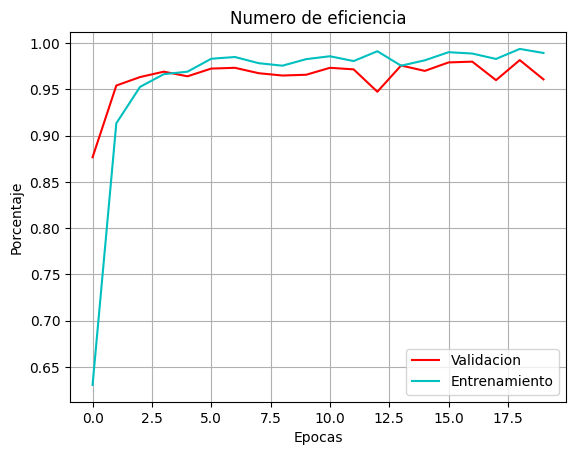

In [52]:
datos = pd.read_csv('/home/Registro_Datos/EfficientNetV2B0/A.csv')

validacion = datos['val_accuracy']
entrenamiento = datos['accuracy']
epocas = datos['epoch']
fig, ax = plt.subplots()
plt.plot(epocas, validacion, "r")
plt.plot(epocas, entrenamiento, "c" )
plt.title("Numero de eficiencia")
plt.xlabel("Epocas")
plt.ylabel("Porcentaje")
plt.legend(["Validacion", "Entrenamiento"])
plt.grid(True)
plt.show()

Pruebas exhaustivas para evaluar los modelos prometedores

In [14]:
for i in range(31):
    Epocas = 9
    modelo = EfficientNetV2_B0(5, (493, 493, 3))
    registro_general = modelo.fit(train_images, epochs=Epocas, validation_data= val_images )
    nombre = 'A'+str(i+1)+'.csv'
    guardar_datos(registro_general, nombre)
    

Epoch 1/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 136ms/step - accuracy: 0.4862 - loss: 6.3268 - val_accuracy: 0.9292 - val_loss: 0.2415
Epoch 2/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9358 - loss: 0.1969 - val_accuracy: 0.9650 - val_loss: 0.1051
Epoch 3/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9676 - loss: 0.1019 - val_accuracy: 0.9742 - val_loss: 0.0933
Epoch 4/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9709 - loss: 0.0904 - val_accuracy: 0.9733 - val_loss: 0.0943
Epoch 5/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9737 - loss: 0.0838 - val_accuracy: 0.9700 - val_loss: 0.1136
Epoch 6/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9831 - loss: 0.0476 - val_accuracy: 0.9800 - val_loss: 0.0686
Epoch 7/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9857 - loss: 0.0531 - val_accuracy: 0.9625 - val_loss: 0.1044
Epoch 8/9
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9754 - loss: 0.0697 - 

A25.csv
Diferencia  0.0016666650772093616
A28.csv
Diferencia  0.005416691303253174
A4.csv
Diferencia  0.003125011920928844
A2.csv
Diferencia  0.008541703224182018
sobreajustado  27
subajustado  4


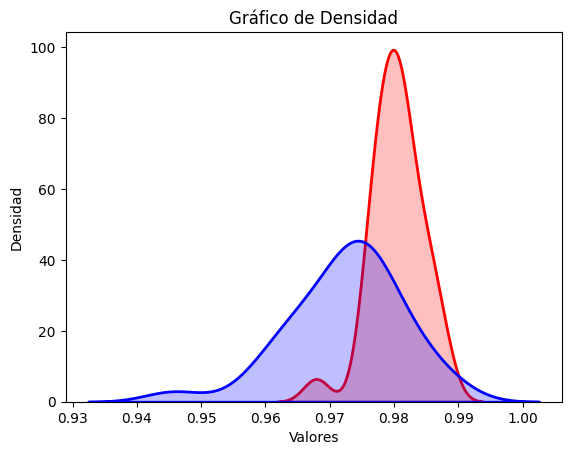

/tmp/ipykernel_810250/1525501222.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(entrenamiento)
/tmp/ipykernel_810250/1525501222.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(validacion)


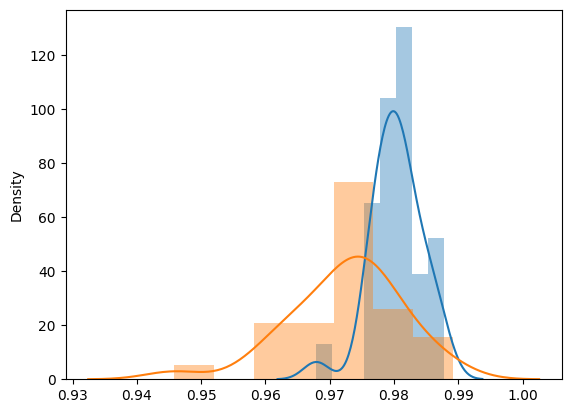

In [25]:
def sacar_informacion(folder_path):
    entrenamiento = []
    validacion = []
    contador_subajustado = 0
    contador_sobreajustado = 0

    for root, dirs, archivo in os.walk(folder_path):
        for nombre in archivo:
            
            file_path = os.path.join(folder_path, nombre)
            df = pd.read_csv(file_path)
            porcentaje_entranamiento = df.loc[df['epoch'] == 8, 'accuracy'].values[0]
            porcentaje_validacion = df.loc[df['epoch'] == 8, 'val_accuracy'].values[0]
            
            if porcentaje_entranamiento > porcentaje_validacion:
                contador_sobreajustado+=1
            else:
                print(nombre)
                print('Diferencia ', (porcentaje_validacion - porcentaje_entranamiento))
                contador_subajustado+=1
                
            entrenamiento.append(porcentaje_entranamiento)
            validacion.append(porcentaje_validacion)
    
    print('sobreajustado ', contador_sobreajustado)
    print('subajustado ', contador_subajustado)
    
    return entrenamiento, validacion

def graficar(entrenamiento, validacion):
    sns.kdeplot(entrenamiento, color="red", linewidth=2, fill=True)
    sns.kdeplot(validacion, color='blue', linewidth=2, fill=True)
    plt.title("Gráfico de Densidad")
    plt.xlabel("Valores")
    plt.ylabel("Densidad")
    plt.show()
    
    sns.distplot(entrenamiento)
    sns.distplot(validacion)
    plt.show()
    
entrenamiento, validacion = sacar_informacion('/home/Pruebas_exhaustivas/EfficientNetV2B0/Configuracion_A/')
graficar(entrenamiento, validacion)

